Importar librerias e inicializar datos






In [ ]:
#pip install graph-lib

In [ ]:
import pandas as pd
import numpy as np
import math
import networkx as nx
import matplotlib.pyplot as plt
import random
from time import time


t_0 = time()
path ='/content/drive/My Drive/Tesis Genetico/Data.xlsx'
data=pd.ExcelFile(path)
sheets = data.sheet_names

print(sheets)

#Tiempo de Servicio por Cliente
S_i = pd.read_excel(path,'S_i',None)
S_i = np.asarray(S_i).T
print("S_i: ",S_i)


#Demanda del cliente
D_i = pd.read_excel(path,'D_i',None)
D_i = np.asarray(D_i).T
print("D_i: ",D_i)

#Recogida del cliente
P_i = pd.read_excel(path,'P_i',None)
P_i = np.asarray(P_i).T
print("P_i: ",P_i)

#Capacidad de Cada uno de los depositos
Q_k = pd.read_excel(path,'Q_k',None)
Q_k = np.asarray(Q_k).T
print("Q_k: ",Q_k)

#Costo fijo de abrir un deposito
F_k = pd.read_excel(path,'F_k',None)
F_k = np.asarray(F_k).T
print("F_k: ",F_k)

#Límite inferior de la ventana de tiempo para cliente i-esimo
W_i = pd.read_excel(path,'W_i',None)
W_i = np.asarray(W_i).T
print("W_i: ",W_i)

#Límite superior de la ventana de tiempo para cliente i-esimo
U_i = pd.read_excel(path,'U_i',None)
U_i = np.asarray(U_i).T
print("U_i: ",U_i)

#Sanción por llegar después del límite superior de la ventana de tiempo
Alpha_i = pd.read_excel(path,'Alpha_i',None)
Alpha_i = np.asarray(Alpha_i).T
print("Alpha_i: ",Alpha_i)

#Sanción por llegar antes del límite inferior de la ventana de tiempo
Beta_i = pd.read_excel(path,'Beta_i',None)
Beta_i = np.asarray(Beta_i).T
print("Beta_i: ",Beta_i)

#Tiempo entre ciente y cliente
T_ij = pd.read_excel(path,'T_ij',None)
T_ij = np.asarray(T_ij)
print("T_ij: ",T_ij)

#Tiempo entre Deposito y cliente
T_ki = pd.read_excel(path,'T_ki',None)
T_ki = np.asarray(T_ki)
print("T_ki: ",T_ki)

#Mapa - Relación Bodega/Cliente
Mapa = pd.read_excel(path,'Mapa',None)
Mapa = np.asarray(Mapa)
print("Mapa: ",Mapa)

#Relacion boleana entre clientes
x_ij=pd.read_excel(path,'x_ij',None)
x_ij = np.asarray(x_ij)
print("x_ij: ",x_ij)

#Costo de Viaje entre i y j para cada deposito
C_ij=np.empty(shape=[0,D_i.shape[1]+1,D_i.shape[1]+1])

print(D_i.shape[1])
for i in range(Mapa.shape[1]):
  name_temp="C_ij_" +str(i+1)
  temp = pd.read_excel(path,name_temp,None)
  temp = np.asarray(temp)
  C_ij=np.append(C_ij, [temp] ,axis=0)

#Posición de deposito
Pos_k = pd.read_excel(path, 'Pos_k', None)
Pos_k = np.asarray(Pos_k)
print("Pos_k: ",Pos_k)

#Posición de clientes
Pos_i = pd.read_excel(path, 'Pos_i', None)
Pos_i = np.asarray(Pos_i)
print("Pos_i: ",Pos_i)

print("C_ij: \n",C_ij)
#print(C_ij[1,0,1])  C_ij[a,b,c]: a=muevo entre matrices , b=renglon , c=columna

#Capacidad de los vehiculos
H=100

#Coste por Vehiculos
V=4

#Tiempo inicial de partida
T_0=8

#Cantidad de clientes
cant_client=C_ij[0].shape[0]-1
t_f_lectura=time()


['S_i', 'C_ij_1', 'C_ij_2', 'C_ij_3', 'C_ij_4', 'C_ij_5', 'D_i', 'P_i', 'Q_k', 'x_ij', 'F_k', 'W_i', 'U_i', 'Alpha_i', 'Beta_i', 'T_ij', 'T_ki', 'Pos_i', 'Pos_k', 'Mapa']
S_i:  [[0.4 0.5 0.6 0.5 0.7 0.4 0.5 0.6 0.5 0.7 0.4 0.5 0.6 0.5 0.7 0.4 0.5 0.6
  0.5 0.7]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: Starting with Pandas version 2.0 all arguments of read_excel except for the first 2 arguments will be keyword-only
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: Starting with Pandas version 2.0 all arguments of read_excel except for the first 2 arguments will be keyword-only


D_i:  [[ 4  7  6 11 10  2  0  8  9 10  4  8  2  4  2  2  1  6  4  2]]
P_i:  [[ 7  8  5  3  7 11 14  7  4  7 12 10 10 15 16 13 15  8 16 12]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: FutureWarning: Starting with Pandas version 2.0 all arguments of read_excel except for the first 2 arguments will be keyword-only
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: FutureWarning: Starting with Pandas version 2.0 all arguments of read_excel except for the first 2 arguments will be keyword-only


Q_k:  [[150 150 300 300 150]]
F_k:  [[13551  5843  9037  8068 13671]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: FutureWarning: Starting with Pandas version 2.0 all arguments of read_excel except for the first 2 arguments will be keyword-only
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: FutureWarning: Starting with Pandas version 2.0 all arguments of read_excel except for the first 2 arguments will be keyword-only


W_i:  [[ 9 10  9 12  9  9 10  9 12  9  9 10  9 12  9  9 10  9 12  9]]
U_i:  [[11 13 10 15 12 11 13 10 15 12 11 13 10 15 12 11 13 10 15 12]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: FutureWarning: Starting with Pandas version 2.0 all arguments of read_excel except for the first 2 arguments will be keyword-only
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: FutureWarning: Starting with Pandas version 2.0 all arguments of read_excel except for the first 2 arguments will be keyword-only


Alpha_i:  [[2 3 4 3 3 2 3 4 3 3 2 3 4 3 3 2 3 4 3 3]]
Beta_i:  [[6 5 7 6 8 6 5 7 6 8 6 5 7 6 8 6 5 7 6 8]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: FutureWarning: Starting with Pandas version 2.0 all arguments of read_excel except for the first 2 arguments will be keyword-only
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: FutureWarning: Starting with Pandas version 2.0 all arguments of read_excel except for the first 2 arguments will be keyword-only


T_ij:  [[0.   1.   0.5  0.8  0.4  0.   1.   0.5  0.8  0.4  0.   1.   0.5  0.8
  0.4  0.   1.   0.5  0.8  0.4 ]
 [1.   0.   0.9  1.   1.2  1.   0.   0.9  1.   1.2  1.   0.   0.9  1.
  1.2  1.   0.   0.9  1.   1.2 ]
 [0.5  0.9  0.   0.54 0.3  0.5  0.9  0.   0.54 0.3  0.5  0.9  0.   0.54
  0.3  0.5  0.9  0.   0.54 0.3 ]
 [0.8  1.   0.54 0.   1.   0.8  1.   0.54 0.   1.   0.8  1.   0.54 0.
  1.   0.8  1.   0.54 0.   1.  ]
 [0.4  1.2  0.3  1.   0.   0.4  1.2  0.3  1.   0.   0.4  1.2  0.3  1.
  0.   0.4  1.2  0.3  1.   0.  ]
 [0.   1.   0.5  0.8  0.4  0.   1.   0.5  0.8  0.4  0.   1.   0.5  0.8
  0.4  0.   1.   0.5  0.8  0.4 ]
 [1.   0.   0.9  1.   1.2  1.   0.   0.9  1.   1.2  1.   0.   0.9  1.
  1.2  1.   0.   0.9  1.   1.2 ]
 [0.5  0.9  0.   0.54 0.3  0.5  0.9  0.   0.54 0.3  0.5  0.9  0.   0.54
  0.3  0.5  0.9  0.   0.54 0.3 ]
 [0.8  1.   0.54 0.   1.   0.8  1.   0.54 0.   1.   0.8  1.   0.54 0.
  1.   0.8  1.   0.54 0.   1.  ]
 [0.4  1.2  0.3  1.   0.   0.4  1.2  0.3  1.   0.   0.4  1.2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: FutureWarning: Starting with Pandas version 2.0 all arguments of read_excel except for the first 2 arguments will be keyword-only
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: FutureWarning: Starting with Pandas version 2.0 all arguments of read_excel except for the first 2 arguments will be keyword-only


Mapa:  [[ 1  1  1]
 [ 2  2  2]
 [ 3  3  3]
 [ 4  4  4]
 [ 5  5  5]
 [ 6  6  6]
 [ 7  7  7]
 [ 8  8  8]
 [ 9  9  9]
 [10 10 10]
 [11 11 11]
 [12 12 12]
 [13 13 13]
 [14 14 14]
 [15 15 15]
 [16 16 16]
 [17 17 17]
 [18 18 18]
 [19 19 19]
 [20 20 20]]
x_ij:  [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: FutureWarning: Starting with Pandas version 2.0 all arguments of read_excel except for the first 2 arguments will be keyword-only
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:89: FutureWarning: Starting with Pandas version 2.0 all arguments of read_excel except for the first 2 arguments will be keyword-only
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: FutureWarning: Starting with Pandas version 2.0 all arguments of read_excel except for the first 2 arguments will be keyword-only
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:99: FutureWarning: Starting with Pandas version 2.0 all arguments of read_excel except for the first 2 arguments will be keyword-only


Pos_k:  [[ 6 11]
 [10 43]
 [ 1 33]
 [14 23]
 [27 48]]
Pos_i:  [[12 21]
 [ 1  2]
 [11 28]
 [ 2 10]
 [14  5]
 [10 12]
 [23 24]
 [24 11]
 [ 8 30]
 [11 27]
 [29 42]
 [26 47]
 [30 36]
 [37 28]
 [31 27]
 [42 35]
 [42 47]
 [41 23]
 [36 45]
 [43 34]]
C_ij: 
 [[[22. 20. 15. ... 18. 15. 15.]
  [25. 16. 25. ... 20. 15. 15.]
  [23. 22. 19. ... 16. 15. 15.]
  ...
  [15. 28. 22. ... 15. 22. 22.]
  [24. 22. 22. ... 28. 18. 18.]
  [24. 22. 22. ... 28. 18. 18.]]

 [[22. 20. 15. ... 18. 15. 15.]
  [25. 16. 25. ... 20. 15. 15.]
  [23. 22. 19. ... 16. 15. 15.]
  ...
  [15. 28. 22. ... 15. 22. 22.]
  [24. 22. 22. ... 28. 18. 18.]
  [24. 22. 22. ... 28. 18. 18.]]

 [[22. 20. 15. ... 18. 15. 15.]
  [25. 16. 25. ... 20. 15. 15.]
  [23. 22. 19. ... 16. 15. 15.]
  ...
  [15. 28. 22. ... 15. 22. 22.]
  [24. 22. 22. ... 28. 18. 18.]
  [24. 22. 22. ... 28. 18. 18.]]]


Metodo Clarke & Wright - Parte 1

In [ ]:
#EN ESTE BLOQUE SE GENERAN LAS COMBINACIÓN SIN REPETICIÓN Y MANTENIENDO EL ORDEN DE MENOR A MAYOR

def potencia(c):
  if len(c) == 0:
    return [[]]
  r  = potencia(c[:-1])
  return r+[s + [c[-1]] for s in r]

def imprime_ordenado(c):
  for e in sorted(c, key=lambda s: (len(s),s)):
    print(e)

def ordenar(c):
  a=[]
  for e in sorted(c, key=lambda s: (len(s),s)):
    a.append(e)
  return a

def correccion(c,n):
  for i in range(n+1):
    c.pop(0)
  return c

cant_client=15    
ti_Clarck = time()
comb=correccion(ordenar(potencia(range(1,cant_client+1))),cant_client)		

D=np.empty((len(comb),3),dtype=object)

print("Cree combinacion")
cont=0
D= np.empty((len(comb),3),dtype=object)
for i in comb:
  D[cont,1]=np.array(i)
  
  cont+=1

print("Las agregue")
	
#print(D.shape[0])

#Filtrar por máxima carga 
temp=np.empty((len(comb),3),dtype=object)
cont2=0
for i in range(D.shape[0]):
	print(i)
	sum_H=0    #Carga
	
	for j in D[i,1]:
		sum_H+=D_i[0,int(j-1)]
	
	Sum_CD=sum_H  #Carga y descarga no debe sobrepasar
	key=0        #Variable de aviso si en algun momento se pasa entre carga y descarga del limite
	for j in D[i,1]:
		Sum_CD=Sum_CD-D_i[0,int(j-1)]+P_i[0,int(j-1)]
		if Sum_CD>H: key=1

	sum_bool=0
	for j in range(D[i,1].shape[0]-1):		
		sum_bool+=x_ij[D[i,1][j]-1, D[i,1][j+1]-1]
	if sum_bool< (D[i,1].shape[0]-1): key=1
	if sum_H <= H and key==0:
		temp[cont2,1] = D[i,1]
		temp[cont2,2]=0
		cont2+=1
D = np.delete(temp ,range(cont2,temp.shape[0]),axis=0 )		
print("Agrega ", cont2)	
print("Termino de eliminar")		

#Cantidad de depositos
cant_dep=Mapa.shape[1]

#Multiplicar los arreglos para que combinen con cada deposito
temp=D.shape[0]
matriz_temp=D
for i in range(cant_dep-1):
  D = np.append(D,matriz_temp,axis=0)
for i in range(cant_dep):
	for j in range(matriz_temp.shape[0]):
		D[matriz_temp.shape[0]*i+j,2]=i
print("Matriz filtrada por carga y multiplicada para cada deposito")
print(D)

Se han truncado las últimas 5000 líneas del flujo de salida.
27763
27764
27765
27766
27767
27768
27769
27770
27771
27772
27773
27774
27775
27776
27777
27778
27779
27780
27781
27782
27783
27784
27785
27786
27787
27788
27789
27790
27791
27792
27793
27794
27795
27796
27797
27798
27799
27800
27801
27802
27803
27804
27805
27806
27807
27808
27809
27810
27811
27812
27813
27814
27815
27816
27817
27818
27819
27820
27821
27822
27823
27824
27825
27826
27827
27828
27829
27830
27831
27832
27833
27834
27835
27836
27837
27838
27839
27840
27841
27842
27843
27844
27845
27846
27847
27848
27849
27850
27851
27852
27853
27854
27855
27856
27857
27858
27859
27860
27861
27862
27863
27864
27865
27866
27867
27868
27869
27870
27871
27872
27873
27874
27875
27876
27877
27878
27879
27880
27881
27882
27883
27884
27885
27886
27887
27888
27889
27890
27891
27892
27893
27894
27895
27896
27897
27898
27899
27900
27901
27902
27903
27904
27905
27906
27907
27908
27909
27910
27911
27912
27913
27914
27915
27916
27917
27918
279

Metodo Clarke & Wright - Parte 2

In [ ]:
#Método C&W nos das el punto de partida antes de comenzar aplicar el algoritmo

#Matriz de seleccion
Sel=np.empty((D.shape[0],3),dtype=object) 

cont2=0
#Primer filtro por imposibilidad de ruta entre deposito y cliente
for k in range(cant_dep):
  for i in range(int(D.shape[0]/cant_dep)):
     print(i)
     cont=0
     pos = int(D.shape[0]/cant_dep)*k+i
     
     for j in D[pos,1]:
       for item in Mapa[:,k]:
         if item == j:
           cont=cont+1
     if cont ==  D[pos,1].shape[0]:
       Sel[cont2,1] = D[pos,1]
       Sel[cont2,2] = D[pos,2]
       cont2+=1
Sel = np.delete(Sel ,range(cont2,Sel.shape[0]),axis=0 )	

#Calculo de ahorro
for i in range(Sel.shape[0]):
  #Calculo de gasto de ir y volver desde el deposito a cada cliente
  Sum_C0=0
  for j in Sel[i,1]:
    Sum_C0+=C_ij[Sel[i,2],0,int(j)]
  Sum_C0*=2
  #Calculo de costo de ruta
  Sum_Cij=C_ij[Sel[i,2],0,int(Sel[i,1][0])]+C_ij[Sel[i,2],0,int(Sel[i,1][-1])]
  for j in range(Sel[i,1].shape[0]-1):
      Sum_Cij+=C_ij[Sel[i,2],int(Sel[i,1][j]),int(Sel[i,1][j+1])]
  ahorro=Sum_C0-Sum_Cij
  Sel[i,0]=ahorro  
     

#Ordenar matriz por ahorro
for i in range(Sel.shape[0]):
  for j in range(i,Sel.shape[0]):
    if Sel[i,0]<Sel[j,0]:
      Sel[[i,j],:] =Sel[[j,i],:]



#Eliminar arreglos con ahorro negativo
for i in reversed(range(Sel.shape[0])):
  if Sel[i,0] < 0:
    Sel = np.delete(Sel, i , axis=0)



Sel_Clarck = np.array(Sel)
#Selección por prioridad de ahorro,exclusividad (sin repetir) y que no superen la cantidad disponible en el deposito
temp= np.empty(shape=[0,3])  #Almacena el vector selección temporalmente
lista_temp=np.array([]) #Almacena de los clientes ya listados
suma_dep=np.zeros((cant_dep,2))  #Acumula la entrega y recodiga por ruta para cada deposito:  Columna indica (col1:entrega , col2:recogida), Renglones indica: cada deposito


for i in Sel:
  key=0 
  for j in i[1]:
    for k in lista_temp:
      if k==j: key=1
  if key==0:       
    if suma_dep[i[2],0]<= Q_k[0,i[2]] and suma_dep[i[2],1]<= Q_k[0,i[2]]:
      for j in i[1]:
        suma_dep[i[2],0]+=D_i[0,int(j-1)]
        suma_dep[i[2],1]+=P_i[0,int(j-1)]
      if suma_dep[i[2],0]<= Q_k[0,i[2]] and suma_dep[i[2],1]<= Q_k[0,i[2]]:
        temp=np.append(temp,[i],axis=0)
        lista_temp=np.append(lista_temp,i[1]) 
      else:
        for j in i[1]:
          suma_dep[i[2],0]-=D_i[0,int(j-1)]
          suma_dep[i[2],1]-=P_i[0,int(j-1)]
 

Sel=temp


#incluir las faltantes:
for i in range(1,cant_client+1):
  dep_min=0
  costo_0=99999
  key=0
  for j in lista_temp:  #Comparar si el cliente esta o no esta en la lista
    if i==j: key=1
  if key==0:      #Si el cliente no esta en la lista, mirar con cual deposito tiene el menor coste
    key2=0
    for j in range(cant_dep):
      
      if C_ij[j][0,i]<costo_0 and ((suma_dep[j,0]+D_i[0,i-1])<= Q_k[0,j]) and ((suma_dep[j,1]+P_i[0,i-1]) <= Q_k[0,j]):
        key2=1
        for k in Mapa[:,j]:    #Verificar que si hay posibilidad de ruta entre el deposito/cliente
          if np.isnan(k)==True: break        
          if k==i: 
            dep_min=j 
            costo_0=C_ij[j][0,i]
        suma_dep[dep_min,0]+=D_i[0,i-1] #No supere la carga
        suma_dep[dep_min,1]+=P_i[0,i-1]
    
    if key2==1: 
                
      lista_temp=np.append(lista_temp,i)
      Sel = np.append(Sel,[[ 0 , np.array([i]) ,   dep_min ]],axis=0)
    
tf_Clarck = time()


matriz_clarck = np.array(Sel)

Se han truncado las últimas 5000 líneas del flujo de salida.
26318
26319
26320
26321
26322
26323
26324
26325
26326
26327
26328
26329
26330
26331
26332
26333
26334
26335
26336
26337
26338
26339
26340
26341
26342
26343
26344
26345
26346
26347
26348
26349
26350
26351
26352
26353
26354
26355
26356
26357
26358
26359
26360
26361
26362
26363
26364
26365
26366
26367
26368
26369
26370
26371
26372
26373
26374
26375
26376
26377
26378
26379
26380
26381
26382
26383
26384
26385
26386
26387
26388
26389
26390
26391
26392
26393
26394
26395
26396
26397
26398
26399
26400
26401
26402
26403
26404
26405
26406
26407
26408
26409
26410
26411
26412
26413
26414
26415
26416
26417
26418
26419
26420
26421
26422
26423
26424
26425
26426
26427
26428
26429
26430
26431
26432
26433
26434
26435
26436
26437
26438
26439
26440
26441
26442
26443
26444
26445
26446
26447
26448
26449
26450
26451
26452
26453
26454
26455
26456
26457
26458
26459
26460
26461
26462
26463
26464
26465
26466
26467
26468
26469
26470
26471
26472
26473
264

#Gráficar grafos con los parametros de entrada


Algoritmo AVNS


In [ ]:
#AVNS utilizando los metodos de sacudida 2-OR y Intercambio 1-0

#Función de Método de vecindades 2-OR
def metodo_2or(vec):
  new_vec=vec
  if vec.size != 1:
    a=random.randint(0,vec.size-2)
    b=random.randint(a+1,vec.size-1)
    copy = np.empty(shape=[0])

    for i in range(a,b+1):
        copy = np.append(copy,vec[i])

    copy= np.flip(copy)

    for i in range(a,b+1):
        new_vec[i] = copy[i-a]
      
  return new_vec

#Función para hacer el intercambio de vecidanrio 1-0
def metodo_inter10(vec1,vec2):
  
  aleatorio=random.randint(1,2)
  if aleatorio==1:
    posi= random.randint(0,vec2.size-1)
    val=vec2[posi]
    print(vec1)
    print(posi)
    print(val)
    if posi > vec1.size:
      vec1_modified = np.append(vec1,val)
    else:
      vec1_modified = np.insert(vec1,posi, val)
    vec2_modified = np.delete(vec2,posi)
  else:
    posi= random.randint(0,vec1.size-1)
    val=vec1[posi]
    if posi > vec2.size:
      vec2_modified = np.append(vec2,val)
    else:
      vec2_modified = np.insert(vec2,posi, val)
    vec1_modified = np.delete(vec1,posi)
  return vec1_modified,vec2_modified  

#Calculo costo ruta
def Costo_Ruta(matriz):
  Sum_Cij=0
  for i in range(matriz.shape[0]):
    Sum_Cij+=C_ij[matriz[i,1],0,int(matriz[i,0][0])]+C_ij[matriz[i,1],0,int(matriz[i,0][-1])]
    for j in range(matriz[i,0].shape[0]-1):
        Sum_Cij+=C_ij[matriz[i,1],int(matriz[i,0][j]),int(matriz[i,0][j+1])]
  return Sum_Cij

#Calculo costo por abrir deposito
def Costo_Deposito(matriz):
  Sum=0
  depositos_activos=np.array([])
  #Armar listo de depositos creados
  for i in matriz[:,1]:
    key=0
    for j in depositos_activos:
      if j==i: key=1
    if key==0: depositos_activos= np.append(depositos_activos,i)
  #Calculo coste de depositos activos
  for i in depositos_activos:
    Sum+=F_k[0,int(i)]
  return Sum

#Calculo costo por flota de vehiculos
def Costo_Vehiculos(matriz):
  return V*matriz.shape[0]


#Calculo castigo por ventanas de tiempo
def Costo_Ventanas(matriz):
  sum_costo=0  
  for i in range(matriz.shape[0]):
    time=T_0 + T_ki[matriz[i,1] , matriz[i,0][0]-1]
    for j in range(matriz[i,0].size):
      pos_cliente = matriz[i,0][j]-1
      if time < W_i[0,pos_cliente]:    #Adicion de costo por llegar antes del intervalo
        sum_costo+=( (W_i[0, pos_cliente ] - time)* Alpha_i[0, pos_cliente ] )
        #print("Temprano: ", ( (W_i[0, pos_cliente ] - time)* Alpha_i[0, pos_cliente ] )  )
      if time > U_i[0,pos_cliente]:    #Adición de costo por llega después del intervalo
        sum_costo+=( (time - U_i[0,pos_cliente])* Beta_i[ 0,pos_cliente ] ) 
        #print("Tarde: ", ( (time - U_i[0,pos_cliente])* Beta_i[ 0,pos_cliente ] ) )
      
      time+= S_i[0, pos_cliente  ]   #Adición de tiempo gastado en el cliente 
      if j < ( matriz[i,0].size - 1):  #Adición de tiempo entre el cliente i y j
        #print("Gastado cliente: ", T_ij[ pos_cliente , matriz[i,0][j+1]-1  ])
        time+= T_ij[ pos_cliente , matriz[i,0][j+1]-1  ] 
  return sum_costo


       

#Costo total
def Costo(matriz):
  Costo_Total=0
  
  Costo_Total+=Costo_Ruta(matriz)
  Costo_Total+=Costo_Deposito(matriz)
  Costo_Total+=Costo_Vehiculos(matriz)
  Costo_Total+=Costo_Ventanas(matriz)
  return Costo_Total

#Filtros

def filtro(matriz): 
  key=0   #Variable de control para saber si se infringe alguna condicion, si llega como 0 al final cumplio todos los filtros
  #Revisar que sea una matriz
  if isinstance(matriz, int):
    key=1
  else:
    #Filtrar por máxima carga y relacion permisible entre rutas
    #print(matriz)
    for i in range(matriz.shape[0]):
      sum_H=0    #Carga
      
      for j in matriz[i,0]:  #Calculo de carga por ruta
        sum_H+=D_i[0,int(j-1)]
      
      Sum_CD=sum_H  #Carga y descarga no debe sobrepasar
      
      for j in matriz[i,0]:
        Sum_CD=Sum_CD-D_i[0,int(j-1)]+P_i[0,int(j-1)]
        if Sum_CD>H: key=1

      sum_bool=0    #Variable contadora 

      for j in range(matriz[i,0].shape[0]-1):
        sum_bool+=x_ij[matriz[i,0][j]-1, matriz[i,0][j+1]-1]
      if sum_bool< (matriz[i,0].shape[0]-1): key=1

    #Filtro por imposibilidad de ruta entre deposito y cliente
    for i in matriz:
      cont=0
      for j in i[0]:
        for k in Mapa[:, i[1]]:
          if j==k: cont+=1
          
      if cont != i[0].size: key=1
    #Filtro por cantidad disponible en el deposito
    suma_dep=np.zeros((cant_dep,2))  #Acumula la entrega y recodiga por ruta para cada deposito
    for i in matriz:
      if suma_dep[i[1],0]<= Q_k[0,i[1]] and suma_dep[i[1],1]<= Q_k[0,i[1]]:
          for j in i[0]:
            suma_dep[i[1],0]+=D_i[0,int(j-1)]
            suma_dep[i[1],1]+=P_i[0,int(j-1)]
          if suma_dep[i[1],0] > Q_k[0,i[1]] or suma_dep[i[1],1] > Q_k[0,i[1]]:
            key=1
       
  
  #print("KEY!!!!!!!!!: " , key)
  return key



#--------------------------------------------------------------------------------
#----------------------------AQUI EMPIEZA EL AVNS--------------------------------
#--------------------------------------------------------------------------------
ti_AVNS = time()
matriz_main=np.array(Sel)   #Pasando los datos semilla para la primera iteración
matriz_main=np.delete(matriz_main,0,axis=1)  #Quitando la columna de ahorros del metodo de Clarke & Wright



#Calculo de Costo de ruta semilla
Costo_min=Costo(matriz_main)

Solucion_Clarck = np.array([Costo_min,matriz_main])


ite=20   #Cantidad de iteraciones
cant_comb=10  #Cantidad de combinaciones que se van a tener a partir de la mejor opción

for i in range(ite):
  comb_matriz= np.empty(shape=[0,2])  #En la primera columna se guardara el valor de la función objetivo  y en la segunda la matriz de rutas
  while comb_matriz.shape[0]<cant_comb:     #Iteracion hasta encontrar la cantidad de rutas
    vecindad=np.empty(shape=[0,2])          #Matriz para guardar los arreglos de las rutas que se modificaran
    matriz_temp=np.array(matriz_main)       #Matriz que se modificará a partir de la inicial
    pos=np.array([])                        #Vector para guardar posición de las rutas a modificar
    while True:                             #Iteración para encontrar vecindarios de manera aleatoria que tengan mas de 1 elemento
      vecindario=random.randint(0,cant_dep-1)
      key=0
      for j in range(matriz_main.shape[0]):
        if matriz_temp[j,1]==vecindario:
          vecindad = np.append(vecindad, [matriz_main[j,:]], axis=0)
          pos = np.append(pos, j)          
      if vecindad.shape[0]>0: break
    if vecindad.shape[0] == 1: case=1
    else: case = random.randint(1,2)
    
    #print(vecindad)
    if case==1:                             #Método 2or
      if vecindad.shape[0] == 1: num_aleatorio=0
      else: num_aleatorio=random.randint(0,vecindad.shape[0]-1)
      temp=np.array(vecindad[num_aleatorio,0])
      temp=metodo_2or(temp)
      matriz_temp = np.delete(matriz_temp,int(pos[num_aleatorio]),axis=0)
      matriz_temp = np.append(matriz_temp,[[temp,vecindad[num_aleatorio,1]]],axis=0)
      comb_matriz=np.append(comb_matriz,[[0,matriz_temp]],axis=0 )
    if case==2:                             #Método 1-0
      num_aleatorio=random.randint(0,vecindad.shape[0]-1)
      while True:
        num_aleatorio2=random.randint(0,vecindad.shape[0]-1)
        if num_aleatorio != num_aleatorio2: break
      temp=np.array(vecindad[num_aleatorio,0])
      temp2=np.array(vecindad[num_aleatorio2,0])
      temp,temp2=metodo_inter10(temp,temp2)  
      #print(temp,temp2)   
      matriz_temp = np.delete(matriz_temp,[int(pos[num_aleatorio]),int(pos[num_aleatorio2])],axis=0)
      if temp.size !=0 : matriz_temp = np.append(matriz_temp,[[temp,vecindad[num_aleatorio,1]]],axis=0)
      if temp2.size !=0 :matriz_temp = np.append(matriz_temp,[[temp2,vecindad[num_aleatorio2,1]]],axis=0)
      comb_matriz=np.append(comb_matriz,[[0,matriz_temp]],axis=0 )
  
  #print("######################")
  #print(comb_matriz[0][0]) #Ejemplo de como entrar a los valores de la matriz de combinaciones
  #print("######################")

  #Calculo Coste para cada opción
  for j in range(cant_comb):
    comb_matriz[j][0]=Costo(comb_matriz[j][1])
  
  #Ordenar opciones por menor coste
  for n in range(cant_comb):
    for j in range(n,cant_comb):
      if comb_matriz[n,0]>comb_matriz[j,0]:
        comb_matriz[[n,j],:] =comb_matriz[[j,n],:]
  print(comb_matriz)

  #Verificar que cumple restricciones
  #print("######################")
  for j in range(cant_comb):
    if filtro(comb_matriz[j][1]) == 0 and comb_matriz[j][0] < Costo_min:
      #print("ENTREEEEEEEEEEEEEEEEEEEe")
      Costo_min = comb_matriz[j][0]
      matriz_main = np.array(comb_matriz[j][1])
  
      

  #print("Iteracion #",i)

tf_AVNS = time()

Solucion_AVNS= np.array([Costo_min,matriz_main])

[ 1  3  4  5  6  7  9 11 12 13 15]
0
10
[[23175.36
  array([[array([ 2,  8, 14]), 2],
       [array([ 1,  3,  4,  5,  6,  7,  9, 12, 13, 15]), 0],
       [array([10, 11]), 0]], dtype=object)]
 [23201.58
  array([[array([ 2,  8, 14]), 2],
       [array([ 1,  4,  5,  6,  7,  9, 11, 12, 13, 15]), 0],
       [array([10,  3]), 0]], dtype=object)]
 [23213.32
  array([[array([ 1,  3,  4,  5,  6,  7,  9, 11, 12, 13, 15]), 0],
       [array([10]), 0],
       [array([ 8,  2, 14]), 2]], dtype=object)]
 [23228.8
  array([[array([ 1,  3,  4,  5,  6,  7,  9, 11, 12, 13, 15]), 0],
       [array([ 2,  8, 14]), 2],
       [array([10]), 0]], dtype=object)]
 [23236.6
  array([[array([ 1,  3,  4,  5,  6,  7,  9, 11, 12, 13, 15]), 0],
       [array([10]), 0],
       [array([14,  8,  2]), 2]], dtype=object)]
 [23236.6
  array([[array([ 1,  3,  4,  5,  6,  7,  9, 11, 12, 13, 15]), 0],
       [array([10]), 0],
       [array([14,  8,  2]), 2]], dtype=object)]
 [23238.9
  array([[array([ 1,  3,  4,  5,  6,  7, 

In [ ]:
print(Solucion_Clarck)

[23228.8
 array([[array([ 1,  3,  4,  5,  6,  7,  9, 11, 12, 13, 15]), 0],
       [array([ 2,  8, 14]), 2],
       [array([10]), 0]], dtype=object)]


Algoritmo Genético

In [ ]:
Sel_Clarck_modified = np.delete(Sel_Clarck,0,axis=1)
#print(Sel_Clarck_modified[1])

def pob_init(matriz):
    
  for cant in range(cant_comb-1):  #Se generara la cantidad de elementos menos 1 - Ya que se incluye el mejor del AVNS
    temp=np.empty(shape=[0,2])     #Lista temporal de solución
    lista_temp=np.array([]) #Almacena de los clientes ya listados  
    suma_dep=np.zeros((cant_dep,2))  #Acumula la entrega y recodiga por ruta para cada deposito:  Columna indica (col1:entrega , col2:recogida), Renglones indica: cada deposito
    num_aleatorio= random.randint(0,Sel_Clarck_modified.shape[0]-1)   #Pone la primera ruta aleatoriamente y luego se llena en orden descendente 
    temp = np.append(temp, [Sel_Clarck_modified[num_aleatorio]],axis=0)
    lista_temp = np.append(lista_temp, Sel_Clarck_modified[num_aleatorio,0])
    for i in Sel_Clarck_modified:
      key=0 
      for j in i[0]:
        for k in lista_temp:
          if k==j: key=1
      if key==0:       
        if suma_dep[i[1],0]<= Q_k[0,i[1]] and suma_dep[i[1],1]<= Q_k[0,i[1]]:
          for j in i[0]:
            suma_dep[i[1],0]+=D_i[0,int(j-1)]
            suma_dep[i[1],1]+=P_i[0,int(j-1)]
          if suma_dep[i[1],0]<= Q_k[0,i[1]] and suma_dep[i[1],1]<= Q_k[0,i[1]]:
            temp=np.append(temp,[i],axis=0)
            lista_temp=np.append(lista_temp,i[0]) 
          else:
            for j in i[0]:
              suma_dep[i[1],0]-=D_i[0,int(j-1)]
              suma_dep[i[1],1]-=P_i[0,int(j-1)]
    #incluir las faltantes:
    for i in range(1,cant_client+1):
      dep_min=0
      costo_0=99999
      key=0
      for j in lista_temp:  #Comparar si el cliente esta o no esta en la lista
        if i==j: key=1
      if key==0:      #Si el cliente no esta en la lista, mirar con cual deposito tiene el menor coste
        key2=0
        for j in range(cant_dep):
          
          if C_ij[j][0,i]<costo_0 and ((suma_dep[j,0]+D_i[0,i-1])<= Q_k[0,j]) and ((suma_dep[j,1]+P_i[0,i-1]) <= Q_k[0,j]):
            key2=1
            for k in Mapa[:,j]:    #Verificar que si hay posibilidad de ruta entre el deposito/cliente
              if np.isnan(k)==True: break        
              if k==i: 
                dep_min=j 
                costo_0=C_ij[j][0,i]
            suma_dep[dep_min,0]+=D_i[0,i-1] #No supere la carga
            suma_dep[dep_min,1]+=P_i[0,i-1]
        
        if key2==1: 
                    
          lista_temp=np.append(lista_temp,i)
          temp = np.append(temp,[[ np.array([i]) ,   dep_min ]],axis=0)

    matriz = np.append(matriz, [[0,temp]], axis=0) 
            
  return matriz

def afinidad(matriz_1,matriz_2):
  afin=0
  for i in matriz_1:
    for j in matriz_2:
      if j[0].size < i[0].size:
          cant_elementos = j[0].size
      else:
        cant_elementos = i[0].size
      for k in range(cant_elementos):
        if j[0][k] == i[0][k] :
          if j[1] == i[1]:
            afin+=1
          else:
            afin+=0.5      
  return afin

def Crossover(matriz1,matriz2):
  #print("JEJEJE ENTRE \n")
  poblacion = np.empty(shape=[0,2])
  for cant in range(cant_comb):   #Cambiar 1 por cant_comb
    hijo=np.empty(shape=[0,2])
    if cant%2 == 0:
      num_aleatorio=random.randint(0,matriz1.shape[0]-2)
      if num_aleatorio == 0:
        hijo=np.append(hijo, matriz1[[0],: ],axis=0 )
      else:
        hijo=np.append(hijo, matriz1[[0,num_aleatorio],: ],axis=0 )
      
    else:
      num_aleatorio=random.randint(0,matriz2.shape[0]-2)
      if num_aleatorio == 0:
        hijo=np.append(hijo, matriz2[[0],: ],axis=0 )
      else:
        hijo=np.append(hijo, matriz2[[0,num_aleatorio],: ],axis=0 )

    lista_temp=np.array([])
    for i in hijo:
      lista_temp = np.append(lista_temp , i[0])
    #Agregar los posibles con la lista de Clarck invertido para garantizar diversidad en los hijos

    suma_dep=np.zeros((cant_dep,2))  #Acumula la entrega y recodiga por ruta para cada deposito:  Columna indica (col1:entrega , col2:recogida), Renglones indica: cada deposito
   
    for i in reversed(Sel_Clarck_modified):
      key=0 
      for j in i[0]:
        for k in lista_temp:
          if k==j: key=1
      if key==0:       
        if suma_dep[i[1],0]<= Q_k[0,i[1]] and suma_dep[i[1],1]<= Q_k[0,i[1]]:
          for j in i[0]:
            suma_dep[i[1],0]+=D_i[0,int(j-1)]
            suma_dep[i[1],1]+=P_i[0,int(j-1)]
          if suma_dep[i[1],0]<= Q_k[0,i[1]] and suma_dep[i[1],1]<= Q_k[0,i[1]]:
            hijo=np.append(hijo,[i],axis=0)
            lista_temp=np.append(lista_temp,i[0]) 
          else:
            for j in i[0]:
              suma_dep[i[1],0]-=D_i[0,int(j-1)]
              suma_dep[i[1],1]-=P_i[0,int(j-1)]
    
    #incluir las faltantes:
    for i in range(1,cant_client+1):
      dep_min=0
      costo_0=99999
      key=0
      for j in lista_temp:  #Comparar si el cliente esta o no esta en la lista
        if i==j: key=1
      if key==0:      #Si el cliente no esta en la lista, mirar con cual deposito tiene el menor coste
        key2=0
        for j in range(cant_dep):
          
          if C_ij[j][0,i]<costo_0 and ((suma_dep[j,0]+D_i[0,i-1])<= Q_k[0,j]) and ((suma_dep[j,1]+P_i[0,i-1]) <= Q_k[0,j]):
            key2=1
            for k in Mapa[:,j]:    #Verificar que si hay posibilidad de ruta entre el deposito/cliente
              if np.isnan(k)==True: break        
              if k==i: 
                dep_min=j 
                costo_0=C_ij[j][0,i]
            suma_dep[dep_min,0]+=D_i[0,i-1] #No supere la carga
            suma_dep[dep_min,1]+=P_i[0,i-1]
        
        if key2==1: 
                    
          lista_temp=np.append(lista_temp,i)
          hijo = np.append(hijo,[[ np.array([i]) ,   dep_min ]],axis=0)

    poblacion = np.append(poblacion, [[0,hijo]], axis=0) 
     
  return poblacion

def Mutacion(matriz):
  cantidad=math.ceil(cant_comb*porcentaje_mutacion/100)
  
  for cant in range(cantidad):
    while True:
      num_aleatorio = random.randint(0, matriz.shape[0]-1)
      num_aleatorio2 = random.randint(0, matriz[num_aleatorio][1].shape[0]-1)
      if matriz[num_aleatorio][1][num_aleatorio2][0].shape[0] != 1 : break
    
    a=random.randint(0, matriz[num_aleatorio][1][num_aleatorio2].shape[0] -1 )
    while True:
      b=random.randint(0, matriz[num_aleatorio][1][num_aleatorio2].shape[0] -1 )
      if a != b: break
    
    valor_1 = matriz[num_aleatorio][1][num_aleatorio2][0][a]
    valor_2 = matriz[num_aleatorio][1][num_aleatorio2][0][b]
    matriz[num_aleatorio][1][num_aleatorio2][0][a] = valor_2
    matriz[num_aleatorio][1][num_aleatorio2][0][b] = valor_1

  return matriz

    
#--------------------------------------------------------------------------------
#----------------------------AQUI EMPIEZA EL GENÉTICO----------------------------
#--------------------------------------------------------------------------------
ti_Gen = time()
#Población inicial será el mejor del AVNS + elementos creados a partir de Clarck & Wright
cont=0
porcentaje_mutacion=10

while True:
  matriz_poblacion=np.empty(shape=[0,2])
  matriz_poblacion = np.append(matriz_poblacion,[[0,matriz_main]],axis=0 )

  matriz_poblacion = pob_init(matriz_poblacion)
  #Calculo Coste para cada opción
  for j in range(cant_comb):
    matriz_poblacion[j][0]=Costo(matriz_poblacion[j][1])
  #Ordenar opciones por menor coste
  for n in range(cant_comb):
    for j in range(n,cant_comb):
      if matriz_poblacion[n,0]>matriz_poblacion[j,0]:
        matriz_poblacion[[n,j],:] = matriz_poblacion[[j,n],:]
  #print("-------------------------------------------------")
  #print(matriz_poblacion)
  #print("-------------------------------------------------")
  #Verificar que cumple restricciones
  #print("######################")
  for j in reversed(range(cant_comb)):
    if filtro(matriz_poblacion[j][1]) == 1:
      matriz_poblacion = np.delete(matriz_poblacion,j, axis=0)
  for j in range(matriz_poblacion.shape[0]):
    #print(matriz_poblacion)
    if matriz_poblacion[j][0] <= Costo_min:      
      Costo_min = matriz_poblacion[j][0]
      matriz_poblacion_aux = np.array([matriz_poblacion[j]])
  
  
  if matriz_poblacion.shape[0]>1 or cont==10:
    break
  cont+=1
  
#print(matriz_poblacion)
#print("\n Costo min:", Costo_min)

#Calculo de Afinidad
lista_afinidad = np.array([])
for i in range(1,matriz_poblacion.shape[0]):
  lista_afinidad = np.append(lista_afinidad, afinidad(matriz_poblacion[0][1], matriz_poblacion[i][1]))

pos_madre =np.where(lista_afinidad == np.amax(lista_afinidad))
#print(pos_madre)
pos_madre = pos_madre[0][0] + 1


#Padres - Agregar a madre
matriz_poblacion_aux = np.append(matriz_poblacion_aux,[matriz_poblacion[pos_madre]],axis=0)


#Iteración cantidad de generaciones será igual a la cantidad del AVNS
for i in range(ite-1): #Cambiar 1 por ite-1
  #Crossover - Generación de la nueva población
  matriz_poblacion = Crossover(matriz_poblacion_aux[0][1],matriz_poblacion_aux[1][1])
  #print("-------------------------------------------------")
  #print(matriz_poblacion)
  #print("-------------------------------------------------")

  # Mutación cambio de posición en una ruta
  matriz_poblacion = Mutacion(matriz_poblacion)
  #print(matriz_poblacion)
  #print("-------------------------------------------------")

  #Calculo de Función Objetivo (Costo -> Minimizar)
  for j in range(cant_comb):
    matriz_poblacion[j][0]=Costo(matriz_poblacion[j][1])
  #Ordenar opciones por menor coste
  for n in range(cant_comb):
    for j in range(n,cant_comb):
      if matriz_poblacion[n,0]>matriz_poblacion[j,0]:
        matriz_poblacion[[n,j],:] = matriz_poblacion[[j,n],:]
  #print(matriz_poblacion)
  #print("-------------------------------------------------")
  
  #Comparar el mejor de la nueva generación con el padre para ver quien es el nuevo padre
  for j in range(cant_comb):
    
    if filtro(matriz_poblacion[j][1]) == 0 and matriz_poblacion[j][0] < Costo_min:      
      Costo_min = matriz_poblacion[j][0]
      matriz_poblacion_aux = np.array([matriz_poblacion[j]])
      #print("Es mejor el nuevo: ",j)
      #print("Costo: " , Costo_min)
  #print(matriz_poblacion_aux)

  #Calculo de Afinidad
  lista_afinidad = np.array([])
  for i in range(1,matriz_poblacion.shape[0]):
    lista_afinidad = np.append(lista_afinidad, afinidad(matriz_poblacion_aux[0][1], matriz_poblacion[i][1]))
  #print(lista_afinidad)

  pos_madre =np.where(lista_afinidad == np.amax(lista_afinidad))
  #print(pos_madre)
  pos_madre = pos_madre[0][0] + 1
  #print(pos_madre)

  #Agregar madre
  matriz_poblacion_aux = np.append(matriz_poblacion_aux,[matriz_poblacion[pos_madre]],axis=0)
tf_Gen = time()

Solucion_Genetico= np.array(matriz_poblacion_aux[0])    


------------------------------------------------- 
--------------- RESULTADOS FINALES --------------
------------------------------------------------- 

Solución Clarck & Wright
Costo:  23228.8
[['Rutas: ' '365.0']
 ['Depositos: ' '22588']
 ['Vehiculos: ' '12']
 ['Ventanas: ' '263.8']]
Tiempo de computación [s]:  1674.7904303073883


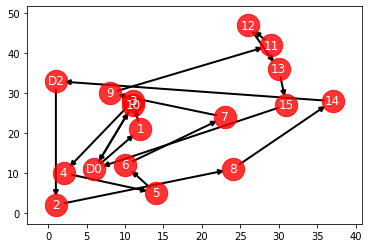

------------------------------------------------- 

Solución AVNS
Costo:  22943.2
[['Rutas: ' '330.0']
 ['Depositos: ' '22588']
 ['Vehiculos: ' '12']
 ['Ventanas: ' '13.200000000000028']]
Tiempo de computación [s]:  0.22538208961486816


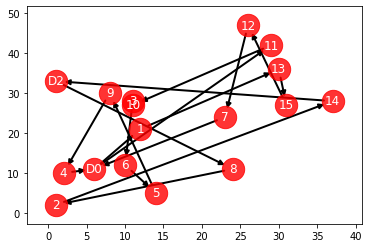

------------------------------------------------- 

Solución Genético
Costo:  6511.28
[['Rutas: ' '392.0']
 ['Depositos: ' '5843']
 ['Vehiculos: ' '8']
 ['Ventanas: ' '212.45999999999998']]
Tiempo de computación [s]:  465.8611125946045


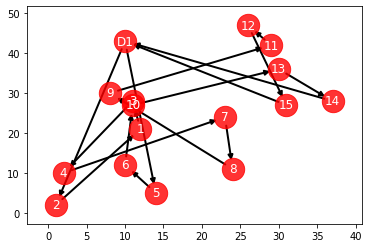

-------------------------------------------------
------------------------------------------------- 

Tiempo Carga Lectura de Datos:  2.3138763904571533
-------------------------------------------------
Tiempo Graficación:  1.6153926849365234
-------------------------------------------------
Tiempo total de ejecución del programa fueron  2146.488459587097  segundos


In [ ]:
def graficar(matriz_main):
  Sel = np.array(matriz_main)
  list_pos ={}
  list_edges=np.empty(shape=[0,2])
  name_dep= np.empty(shape=[0])
  G = nx.DiGraph()
  
  list_name_depositos= np.array([])
  for i in range(Sel.shape[0]):
    dep_temp = 'D'+str(int(Sel[i,1]))
    list_pos[dep_temp] = ( Pos_k[int(Sel[i,1]),0],Pos_k[int(Sel[i,1]),1] )
    
    for j in list_name_depositos:
      key=0
      if j==dep_temp:
        key=1
      if key==0: list_name_depositos=np.append(list_name_depositos,dep_temp)
    
    list_edges = np.append(list_edges,[[dep_temp,int(Sel[i,0][0])]],axis=0 ) #Relación entre deposito y cliente inicial
    
    
    for j in range(Sel[i,0].shape[0] -1):
      list_edges = np.append(list_edges,[[int(Sel[i,0][j]),int(Sel[i,0][j+1])]],axis=0 )
    for j in range(Sel[i,0].shape[0]):
      list_pos[str(int(Sel[i,0][j]))] = ( Pos_i[int(Sel[i,0][j])-1,0],Pos_i[int(Sel[i,0][j])-1,1] )
      
    list_edges = np.append(list_edges,[[int(Sel[i,0][-1]),dep_temp]],axis=0 ) #Relación entre cliente final y deposito
  #print(list_edges)  
  #print(list_pos)
  #print("__________________") 
    
  #print(list_edges)  
 
  G.add_edges_from(list_edges)
  pos = list_pos
  fig, ax = plt.subplots()
  nx.draw_networkx_nodes(G,pos,node_color = 'r', node_size = 500, alpha=0.8, ax=ax  )
  nx.draw_networkx_labels(G, pos, font_color='w')
  nx.draw_networkx_edges(G, pos, edgelist=list_edges, arrows=True, edge_color='k', width=2 )
  ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
  plt.show()

def Costo_Segre(matriz):
  Costo_Segregado=np.empty(shape=[0,2])
  Costo_Segregado = np.append(Costo_Segregado, [["Rutas: ", Costo_Ruta(matriz)]], axis=0)
  Costo_Segregado = np.append(Costo_Segregado, [["Depositos: ", Costo_Deposito(matriz)]], axis=0)
  Costo_Segregado = np.append(Costo_Segregado, [["Vehiculos: ", Costo_Vehiculos(matriz)]], axis=0)
  Costo_Segregado = np.append(Costo_Segregado, [["Ventanas: ", Costo_Ventanas(matriz)]], axis=0)
  
  return Costo_Segregado
  
t_0_graf=time()
#Aqui empieza la impresión de resultados Clarck / AVNS / Genético
print("------------------------------------------------- ") 
print("--------------- RESULTADOS FINALES --------------")
print("------------------------------------------------- \n") 
print("Solución Clarck & Wright")
print("Costo: ",Solucion_Clarck[0])
print(Costo_Segre(Solucion_Clarck[1]))
print("Tiempo de computación [s]: ", tf_Clarck-ti_Clarck )
graficar(Solucion_Clarck[1])

print("------------------------------------------------- \n") 
print("Solución AVNS")
print("Costo: ",Solucion_AVNS[0])
print(Costo_Segre(Solucion_AVNS[1]))
print("Tiempo de computación [s]: ", tf_AVNS-ti_AVNS )
graficar(Solucion_AVNS[1])
print("------------------------------------------------- \n") 
print("Solución Genético")
print("Costo: ",Solucion_Genetico[0])
print(Costo_Segre(Solucion_Genetico[1]))
print("Tiempo de computación [s]: ", tf_Gen-ti_Gen )
graficar(Solucion_Genetico[1])
print("-------------------------------------------------") 
print("------------------------------------------------- \n") 
print("Tiempo Carga Lectura de Datos: ",t_f_lectura -t_0 )
print("-------------------------------------------------") 
print("Tiempo Graficación: ",time() -t_0_graf )
print("-------------------------------------------------") 
print("Tiempo total de ejecución del programa fueron ", time()-t_0, " segundos")